# Data fields
**ID - an Id that represents a (Shop, Item) tuple within the test set  
shop_id - unique identifier of a shop  
item_id - unique identifier of a product  
item_category_id - unique identifier of item category  
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure  
item_price - current price of an item  
date - date in format dd/mm/yyyy  
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,...,   October 2015 is 33  
item_name - name of item  
shop_name - name of shop  
item_category_name - name of item category**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
path = './DataSets/competitive-data-science-predict-future-sales/'

# Train DF and Extra Infos

In [30]:
df_train = pd.read_csv(path+'sales_train.csv', dtype={'date_block_num':'int16','shop_id':'int16','item_id':'int16','item_price':np.float64, 'item_cnt_day':np.float32})
items = pd.read_csv(path+'items.csv', dtype={'item_id':'int32','item_category_id':'int32'})
shops = pd.read_csv(path+'shops.csv', dtype={'shop_id':'int32'})
category = pd.read_csv(path+'item_categories.csv', dtype={'item_category_id':'int32'})

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float64
item_cnt_day      float32
dtypes: float32(1), float64(1), int16(3), object(1)
memory usage: 72.8+ MB


# Test DF and Sample

In [32]:
df_test = pd.read_csv(path+'test.csv')
sample = pd.read_csv(path+'sample_submission.csv')

# 1.0 - Exploratory Data Analysis

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float64
item_cnt_day      float32
dtypes: float32(1), float64(1), int16(3), object(1)
memory usage: 72.8+ MB


In [34]:
## Check for NaN values
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## Check Prices

In [35]:
df_train[df_train.item_price==df_train.item_price.min()]
## One item with -1 on value

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [36]:
df_train[df_train.item_price==df_train.item_price.max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


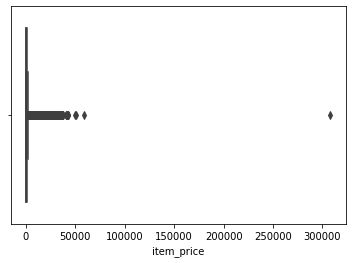

In [37]:
sns.boxplot(x=df_train.item_price)

**One huge outlier**

In [38]:
print('Price mean with outlier:',df_train.item_price.mean())
print("Price median with outlier:", df_train.item_price.median())

Price mean with outlier: 890.8532326979881
Price median with outlier: 399.0


In [39]:
## Drop this 2 rows (can fill with median too)
index = df_train[df_train.item_price==df_train.item_price.max()].index
index = df_train[df_train.item_price==df_train.item_price.min()].index
df_train.drop(index=index, inplace=True)

## Group Analysis

**date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33**

In [40]:
month_price = df_train.groupby(['date_block_num']).sum().drop(['shop_id','item_cnt_day','item_id'], axis=1).reset_index()

Text(0.5, 1.0, 'Revenue per Month')

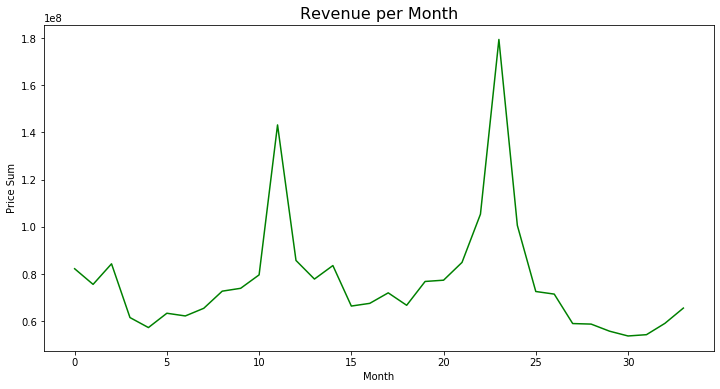

In [41]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='date_block_num',y='item_price',data=month_price, color='green')
ax.set(xlabel='Month', ylabel='Price Sum')
ax.set_title('Revenue per Month', fontsize=16)

In [45]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0
